# Sprawozdanie Antoni Kois, Fili Mazur gr.2

In [38]:
# opcjonalne, zatsnalowanie paczek
%pip install scikit-learn statsmodels


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku
df = pd.read_csv('kois_mazur_projekt_train_data.csv')

# Wyświetlenie pierwszych kilku wierszy danych
print(df.head())

# Sprawdzanie brakujących danych
print(df.isnull().sum())

  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

In [40]:
# Podstawowe statystyki opisowe

# Wybieramy wszystkie kolumny oprócz 'id'
numeric_cols = df.select_dtypes(include='number').columns

stats = pd.DataFrame({
    'mean':      df[numeric_cols].mean(),
    'std':       df[numeric_cols].std(ddof=1),   # odchylenie standardowe (próba)
    'kurtosis':  df[numeric_cols].kurt(),        # kurtoza (nadmiarowa, 0 = N(0,1))
    'skewness':  df[numeric_cols].skew()         # skośność
})

# Dodanie współczynnika zmienności
stats['coef_var'] = stats['std'] / stats['mean']

print(stats)

                         mean         std  kurtosis  skewness  coef_var
Inches              15.049800    1.413668 -0.197870 -0.396643  0.093933
Ram                  8.512000    4.973791  6.300672  2.074162  0.584327
Weight               2.037788    0.662631  2.516759  1.174558  0.325172
Price_euros       1125.706070  705.380659  5.046084  1.620813  0.626612
ScreenW           1908.702000  495.832344  6.758238  2.277741  0.259775
ScreenH           1079.172000  285.957952  5.939480  2.176670  0.264979
CPU_freq             2.286800    0.525055 -0.434995 -0.723646  0.229603
PrimaryStorage     444.428000  372.158373  3.155327  1.624314  0.837387
SecondaryStorage   179.956000  427.102459  4.757773  2.311719  2.373372



Macierz korelacji (zaokrąglenie do 5 miejsc):

                   Inches      Ram   Weight  Price_euros  ScreenW  ScreenH  \
Inches            1.00000  0.23295  0.82392      0.07079 -0.04676 -0.07043   
Ram               0.23295  1.00000  0.38976      0.76340  0.45563  0.44695   
Weight            0.82392  0.38976  1.00000      0.21953 -0.00383 -0.02567   
Price_euros       0.07079  0.76340  0.21953      1.00000  0.57717  0.57513   
ScreenW          -0.04676  0.45563 -0.00383      0.57717  1.00000  0.99355   
ScreenH          -0.07043  0.44695 -0.02567      0.57513  0.99355  1.00000   
CPU_freq          0.29613  0.37303  0.31324      0.43245  0.18731  0.17671   
PrimaryStorage    0.26112  0.01037  0.17174     -0.10604 -0.05033 -0.05732   
SecondaryStorage  0.38299  0.39085  0.47008      0.28036  0.15056  0.13869   

                  CPU_freq  PrimaryStorage  SecondaryStorage  
Inches             0.29613         0.26112           0.38299  
Ram                0.37303         0.01037   

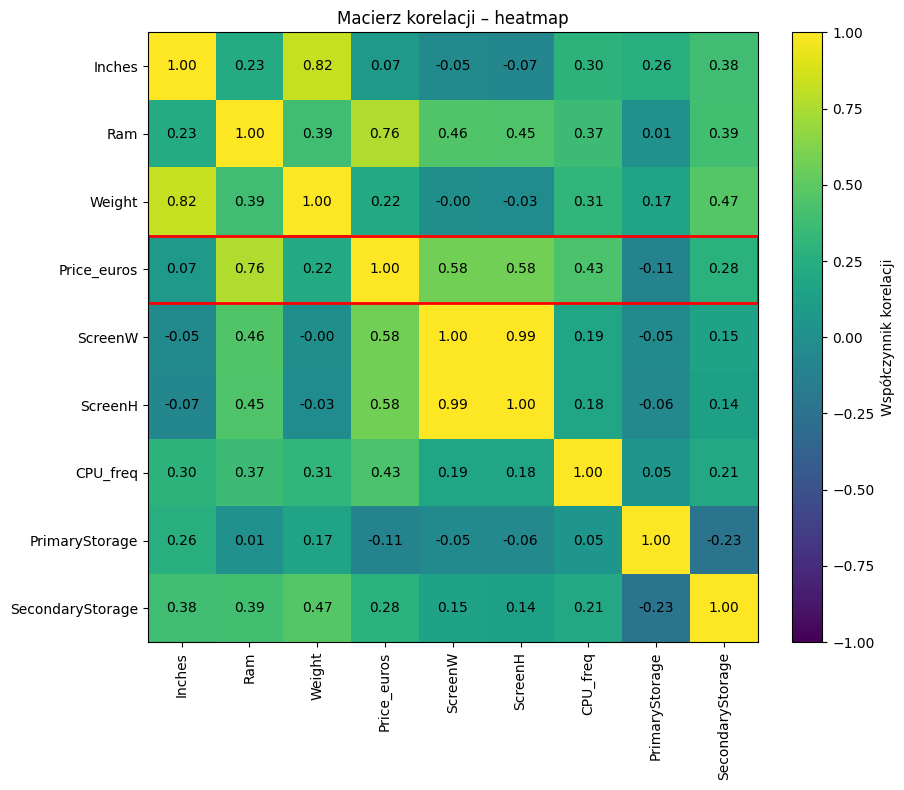

In [42]:
import matplotlib.patches as patches

# Macierz korelacji Pearsona
corr = df[numeric_cols].corr(method="pearson")

print("\nMacierz korelacji (zaokrąglenie do 5 miejsc):\n")
print(corr.round(5))

# Wizualizacja korelacji – mapa cieplna
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr, vmin=-1, vmax=1)  # default colormap

# Opisy osi
ax.set_xticks(range(len(numeric_cols)))
ax.set_xticklabels(numeric_cols, rotation=90, ha="center")
ax.set_yticks(range(len(numeric_cols)))
ax.set_yticklabels(numeric_cols)

# Dodanie wartości liczbowych do komórek
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        value = corr.iloc[i, j]
        ax.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

# Dodanie czerwonej ramki wokół wiersza "Price_euros"
if "Price_euros" in numeric_cols:
    row_index = list(numeric_cols).index("Price_euros")
    rect = patches.Rectangle(
        (-0.5, row_index - 0.5),
        len(numeric_cols),
        1,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

# Pasek kolorów
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Współczynnik korelacji", rotation=90)

plt.title("Macierz korelacji – heatmap")
plt.tight_layout()
plt.show()


- Company - zostawiamy top X kategorii (19 kategorii)
- Product - zbyt dużo kategorii i mniej istotne (618)
- TypeName - mniej istotna zmienna
- Inches - ok
- Ram - ok
- OS - zostawiamy top X kategorii (9 kategorii)
- Weight - ok
- Price_euros - ok
- Screen - 4 kategorie
- ScreenW - ok
- ScreenH - zbyt duża korelacja ze zmienną ScreenW (0.99), więc wyrzucamy
- Touchscreen - ok zmienna 0/1
- IPSpanel - ok zmienna 0/1
- RetinaDisplay - ok zmienna 0/1
- CPU_company - 3 kategorie
- CPU_freq - ok
- CPU_model - zbyt dużo kategorii i mniej istotne (93)
- PrimaryStorage - ok
- SecondaryStorage - ok
- PrimaryStorageType - 4 kategorie
- SecondaryStorageType - mała ilośc danych posaida więc pomijamy
- GPU_company - 3 kategorie
- GPU_model - zbyt dużo kategorii i mniej istotne (110)

In [ ]:
# kolumny do całkowitego usunięcia
DROP_COLS = [
    'Product',
    'TypeName',
    'CPU_model',
    'ScreenH',
    'GPU_model',
    'SecondaryStorageType'
]

# zostawiamy TOP_K a resztę ozancxamy 'Other'
CAT_TOPK_COLS = [
    'Company',
    'OS',
]

# mało kategorii,  zostawiamy wszystkie
CAT_SMALL_COLS = [
    'Screen',
    'CPU_company',
    'PrimaryStorageType',
    'GPU_company'
]

# zmienne 'Yes'/'Not'
BINARY_MAP = {'Yes': 1, 'No': 0}
BIN_COLS = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']


# wszystkie zmienne liczbowe, które zachowujemy
NUM_COLS = [
    'Inches', 'Ram', 'Weight',
    'ScreenW', 'CPU_freq',
    'PrimaryStorage', 'SecondaryStorage'
]

for col in CAT_TOPK_COLS:
    n = df[col].nunique()
    print(f"{col}: {n} unikalnych kategorii")
    
# ile najczęstszych kategorii zostawić
TOP_K = {
    'Company': 6,
    'OS': 5
}

Company: 19 unikalnych kategorii
OS: 9 unikalnych kategorii


In [ ]:
# Usuwamy zbędne kolumny
df = df.drop(columns=DROP_COLS, errors='ignore')

In [ ]:
# Redukujemy zmienne kategoryczne tak by zawierały TOP_K kategorii a reszta została zmieniona na 'Other', czyli pozbywamy się wartości odstających w zmiennych kategorycznych
for col in CAT_TOPK_COLS:
    vc = df[col].value_counts()          # liczebność każdej kategorii
    top = vc.nlargest(TOP_K[col])        # TOP_K najpopularniejszych
    coverage = top.sum() / len(df) * 100       # % pokrycia obserwacji
    
    # Podmieniamy rzadkie kategorie na 'Other'
    df[col] = df[col].where(df[col].isin(top.index), 'Other')
    
    # Info
    print(f"{col}: TOP {TOP_K[col]} kategorii obejmuje {coverage:.2f}% wierszy "
          f"({top.sum()} z {len(df)})")

Company: TOP 6 kategorii obejmuje 90.30% wierszy (903 z 1000)
OS: TOP 5 kategorii obejmuje 97.60% wierszy (976 z 1000)


In [ ]:
# Zmieniamy zmienne binarne na zero-jedynkowe i dodajemy do kolumn liczbowych
df[BIN_COLS] = df[BIN_COLS].replace(BINARY_MAP).astype(int)

/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_31245/4042912299.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[BIN_COLS] = df[BIN_COLS].replace(BINARY_MAP).astype(int)


In [ ]:
import numpy as np
from scipy.stats import skew
from pandas.api.types import is_numeric_dtype

# Badanie stacjonarności zmiennych i eliminacja niestacjonarności - pomijamy ponieważ badanie dotyczy danych przekrojowych

# LOGARYTMOWNIE - narazie pomijamy, gdyż może nie być potrzebne
# to_log = [c for c in NUM_COLS if abs(skew(df[c])) > 1]
# print("Logarytmuję:", to_log)

# for c in to_log:
#     df[c + '_log'] = np.log1p(df[c])





# from scipy.stats import skew, boxcox_normmax
# import statsmodels.api as sm
# import statsmodels.stats.api as sms

# # 1. Skew + Box‑Cox
# print("Skew price:", skew(df['Price_euros']))
# print("Box‑Cox λ:", boxcox_normmax(df['Price_euros'] + 1))

# # 2. Model bez log
# model_lin = smf.ols("Price_euros ~ ...", data=df).fit()
# res_lin = model_lin.resid
# print("BP p‑value (lin):", sms.het_breuschpagan(res_lin, model_lin.model.exog)[1])

# # 3. Model z log
# df['Price_euros_log'] = np.log(df['Price_euros'])
# model_log = smf.ols("Price_euros_log ~ ...", data=df).fit()
# res_log = model_log.resid
# print("BP p‑value (log):", sms.het_breuschpagan(res_log, model_log.model.exog)[1])

In [ ]:
# Wartości odstające

# zwraca (dolna_granica, górna_granica) wg. reguły k*IQR.
def iqr_bounds(series, k=1.5):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    return q1 - k * iqr, q3 + k * iqr



# Zwraca DataFrame z liczbą i % outlierów w każdej kolumnie.
# Niczego nie zmienia w danych. Do sprawdzenia ile wartości odstających
def iqr_report(df: pd.DataFrame, cols, k=1.5):
    rows = []
    for c in cols:
        low, high = iqr_bounds(df[c], k)
        n_out = (~df[c].between(low, high)).sum()
        rows.append([c, n_out, 100 * n_out / len(df), low, high])

    rep = pd.DataFrame(rows,
                       columns=['kolumna', 'odstających', '%', 'dolna', 'górna'])
    rep = rep.sort_values('%', ascending=False)
    return rep



# Zwraca nowy DataFrame bez wierszy uznanych za odstające w podanych kolumnach.
def iqr_filter(df: pd.DataFrame, cols, k=1.5):
    mask = pd.Series(True, index=df.index)
    for c in cols:
        low, high = iqr_bounds(df[c], k)
        mask &= df[c].between(low, high)
    return df[mask].copy()

iqr_report(df, NUM_COLS)


,kolumna,odstających,%,dolna,górna
3,ScreenW,329,32.9,1920.00,1920.00
5,PrimaryStorage,203,20.3,-128.00,896.00
1,Ram,171,17.1,-2.00,14.00
6,SecondaryStorage,164,16.4,0.00,0.00
2,Weight,33,3.3,0.30,3.50
0,Inches,30,3.0,11.60,18.00
4,CPU_freq,0,0.0,0.45,4.05


Po przeanalizowaniu informacji odstających, uzjanemy na początku nie usuwać zadnych żadnych wartości odstających,
gdyż dla większości nich np. jak dla `ScreenW` 80 % laptopów ma dokładnie 1920px wysokości. Każda inna wartość jest traktowana jako “odstająca”, a można też patrzeć na tą zmienną jako kategoryczną.
To samo zjawisko można zauważyć dla kolumn `PrimaryStorage`, `Ram`, `SecondaryStorage`.
Na usunięcie odstających wartości decydujemy się dla kolumn `Weight`, `Inches`.
W dalszej części budowy modelu być może zdecydujemy się na usunięcię z innych pojedynczych zmiennych odstające wartości.

In [ ]:
before = len(df)
df_clean = iqr_filter(df, ['Weight', 'Inches'])

print(f"\nUsunięto {before - len(df_clean)} obserwacji "
      f"({100*(before - len(df_clean))/before:.2f} %).")


Usunięto 62 obserwacji (6.20 %).


In [ ]:
import statsmodels.formula.api as smf

categorical_cols = CAT_TOPK_COLS + CAT_SMALL_COLS
# zmienne oznaczone w formule C(...) są autoamtycznie przetwarzane na zmienne zero-jedynkowe dla modelu ekoenometrycznego z pominięciem pierwszej kategorii jako bazowej.
rhs_terms = NUM_COLS + BIN_COLS + [f"C({c})" for c in categorical_cols]

formula = "Price_euros ~ " + " + ".join(rhs_terms)
print("\nFormuła OLS:\n", formula, "\n")

ols_model = smf.ols(formula=formula, data=df_clean).fit()

print(ols_model.summary())


Formuła OLS:
 Price_euros ~ Inches + Ram + Weight + ScreenW + CPU_freq + PrimaryStorage + SecondaryStorage + Touchscreen + IPSpanel + RetinaDisplay + C(Company) + C(OS) + C(Screen) + C(CPU_company) + C(PrimaryStorageType) + C(GPU_company) 

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     75.40
Date:                Sun, 18 May 2025   Prob (F-statistic):          8.12e-223
Time:                        12:25:54   Log-Likelihood:                -6823.3
No. Observations:                 938   AIC:                         1.371e+04
Df Residuals:                     907   BIC:                         1.386e+04
Df Model:                          30                                         
Covariance Type:            nonrobust          